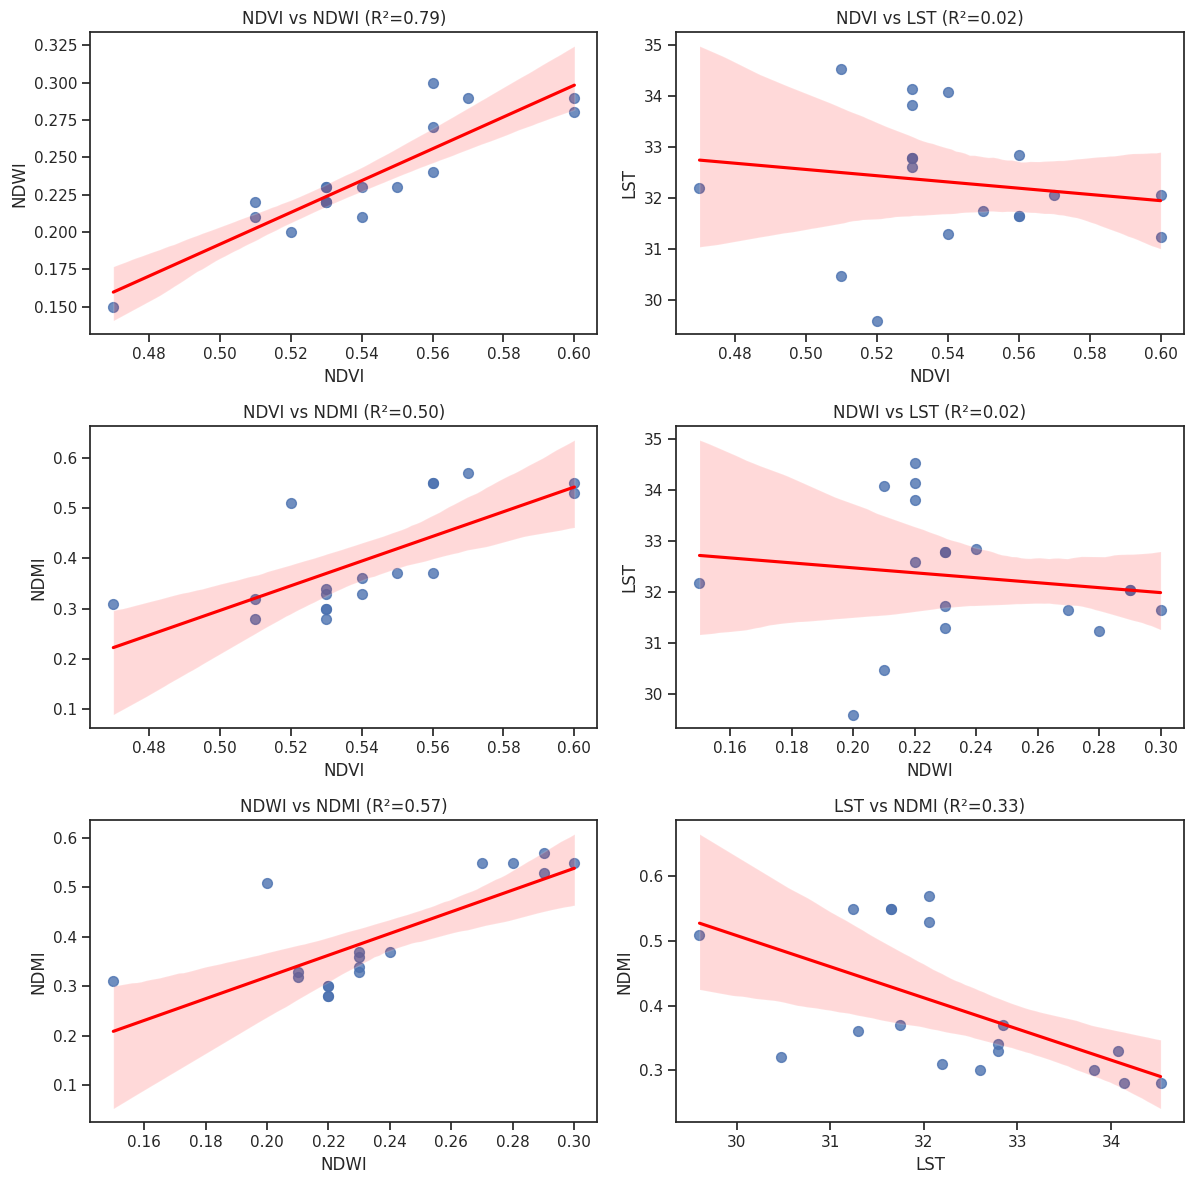

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data
data = {
    'Year': ['2010', '2020', '2023'] * 6,
    'NDVI': [0.56, 0.54, 0.53, 0.60, 0.53, 0.51, 0.60, 0.53, 0.53, 0.52, 0.51, 0.47, 0.57, 0.56, 0.54, 0.56, 0.55, 0.53],
    'NDWI': [0.27, 0.23, 0.22, 0.28, 0.23, 0.22, 0.29, 0.23, 0.22, 0.20, 0.21, 0.15, 0.29, 0.24, 0.21, 0.30, 0.23, 0.22],
    'LST': [31.65, 31.29, 32.60, 31.24, 32.79, 34.53, 32.05, 32.79, 33.82, 29.60, 30.47, 32.19, 32.05, 32.84, 34.08, 31.65, 31.74, 34.14],
    'NDMI': [0.55, 0.36, 0.30, 0.55, 0.33, 0.28, 0.53, 0.34, 0.30, 0.51, 0.32, 0.31, 0.57, 0.37, 0.33, 0.55, 0.37, 0.28]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define pairs for plotting and r-square calculation
pairs = [('NDVI', 'NDWI'), ('NDVI', 'LST'), ('NDVI', 'NDMI'),
         ('NDWI', 'LST'), ('NDWI', 'NDMI'), ('LST', 'NDMI')]

# Initialize the plotting grid
sns.set(style="ticks")
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Plot each pair and calculate r-squared
for i, (x, y) in enumerate(pairs):
    sns.regplot(x=x, y=y, data=df, ax=axes[i], scatter_kws={'s': 50}, line_kws={'color':'red'})

    # Linear regression for R-squared calculation
    model = LinearRegression()
    X = df[[x]].values
    Y = df[y].values
    model.fit(X, Y)
    y_pred = model.predict(X)
    r2 = r2_score(Y, y_pred)

    # Set plot title with R-squared value
    axes[i].set_title(f'{x} vs {y} (R²={r2:.2f})')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
